In [40]:
#references
# https://pixspy.com/
# https://blog.csdn.net/xufive/article/details/112308533
# https://tw511.com/a/01/36832.html
# https://auzhu.com/sports/1025003.html

In [41]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

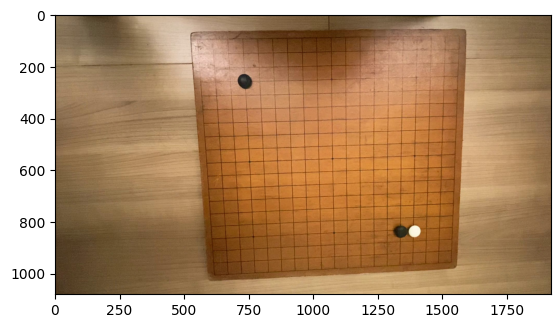

In [42]:
img = cv2.imread('./data/frame444.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [43]:
frame_list = os.listdir('data')
frame_list.sort()

(1080, 1920, 3)


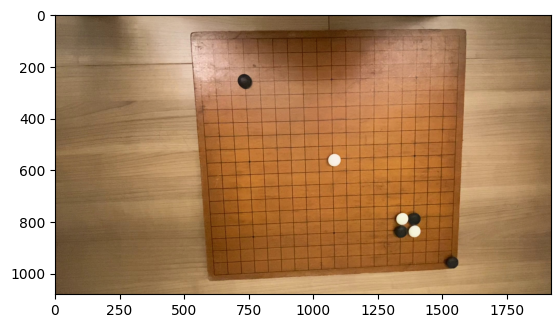

In [44]:
ROOT_PATH = './data'
orig_img = cv2.imread(os.path.join(ROOT_PATH,'frame1012.jpg'))
print(orig_img.shape)
img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB) # 转灰度
img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY) # 转灰度
img = cv2.GaussianBlur(img, (3,3), 0) # 滤波降噪
img_gray = cv2.Canny(img, 30, 50) # 边缘检测
plt.imshow(img_rgb)
plt.show()

(1120, 1120, 3)


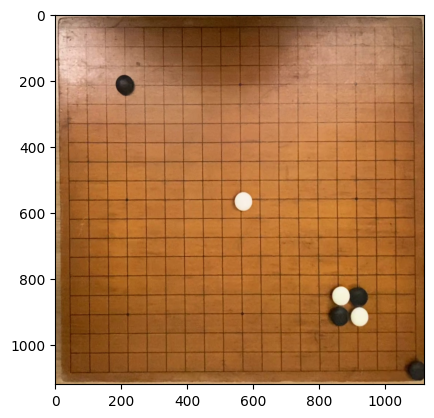

In [45]:
pts1 = np.float32([(10,10), (10,1110), (1110,10), (1110,1110)])
pts2 = np.float32([(523,69),(583,1028),(1588,57),(1544,981)]) 
m = cv2.getPerspectiveTransform(pts2, pts1) 
board_rgb = cv2.warpPerspective(img_rgb, m, (1120, 1120))
board_gray = cv2.warpPerspective(img_gray, m, (1120, 1120))
print(board_rgb.shape)
plt.imshow(board_rgb)
plt.show()

/tmp/ipykernel_32002/1307538553.py:45: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  series = np.linspace(22, 1110, 19, dtype=np.int)


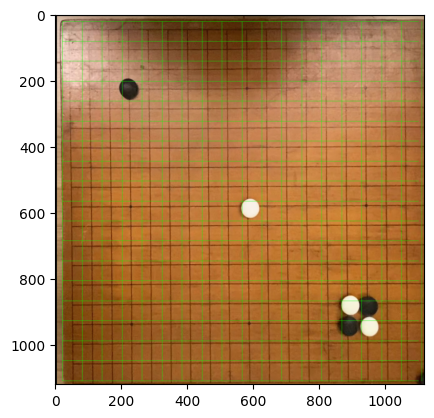

In [50]:
circles = cv2.HoughCircles(board_gray, cv2.HOUGH_GRADIENT, 1, 20, param1=90, param2=16, minRadius=10, maxRadius=20) # 圆检测
xs = circles[0,:,0] # 所有棋子的x坐标
ys = circles[0,:,1] # 所有棋子的y坐标
xs.sort()
ys.sort()
k = 1
const_num = 15
while xs[k]-xs[:k].mean() < const_num:
	k += 1

x_min = int(round(xs[:k].mean()))
k = 1
while ys[k]-ys[:k].mean() < const_num:
	k += 1

y_min = int(round(ys[:k].mean()))
k = -1
while xs[k:].mean() - xs[k-1] < const_num:
	k -= 1

x_max = int(round(xs[k:].mean()))
k = -1
while ys[k:].mean() - ys[k-1] < const_num:
	k -= 1

y_max = int(round(ys[k:].mean()))

if abs(1120-(x_max-x_min)) < abs(1120-(y_max-y_min)):
	v_min, v_max = x_min, x_max
else:
	v_min, v_max = y_min, y_max


lt = (v_min, v_min) # 棋盘网格左上角
lb = (v_min, v_max) # 棋盘网格左下角
rt = (v_max, v_min) # 棋盘网格右上角
rb = (v_max, v_max) # 棋盘网格右下角
pts1 = np.float32([(10,10), (10,1110), (1110,10), (1110,1110)])
pts2 = np.float32([lt, lb, rt, rb])
m = cv2.getPerspectiveTransform(pts2, pts1)
new_board_gray = cv2.warpPerspective(board_gray, m, (1120, 1120))
new_board_bgr = cv2.warpPerspective(board_rgb, m, (1120, 1120))

im = np.copy(new_board_bgr)
series = np.linspace(22, 1110, 19, dtype=np.int)
for i in series:
	im = cv2.line(im, (22, i), (1100, i), (0,255,0), 1)
	im = cv2.line(im, (i, 22), (i, 1110), (0,255,0), 1)

plt.imshow(im)
plt.show()